In [1]:
#Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset

In [2]:
file_path = 'C:/Users/kiransindam/machine Learning/Bank Customer Churn Prediction.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

In [3]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Step 2: Data Preprocessing

In [4]:
# Dropping the 'customer_id' column as it is not useful for prediction
data = data.drop(columns=['customer_id'], axis=1)
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
data.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [10]:
# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'country'], drop_first=True)
data

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [11]:
# Splitting the dataset into features (X) and target (y)
X = data.drop('churn', axis=1)
y = data['churn']

In [12]:
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_Male,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Building the Logistic Regression Model

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Step 4: Model Evaluation
# Predicting on the test set
y_pred = model.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.91324755,
         1.72572313, -0.57638802],
       [-0.96147213, -1.41636539, -0.69539349, ...,  0.91324755,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -1.09499335,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.91324755,
         1.72572313, -0.57638802]])

In [20]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [21]:
# accuracy

# Print evaluation metrics

In [22]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.81
Confusion Matrix:
[[1543   64]
 [ 314   79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [24]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1543   64]
 [ 314   79]]


In [26]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [27]:
# ROC-AUC Score
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {auc_score:.2f}')

ROC AUC Score: 0.78


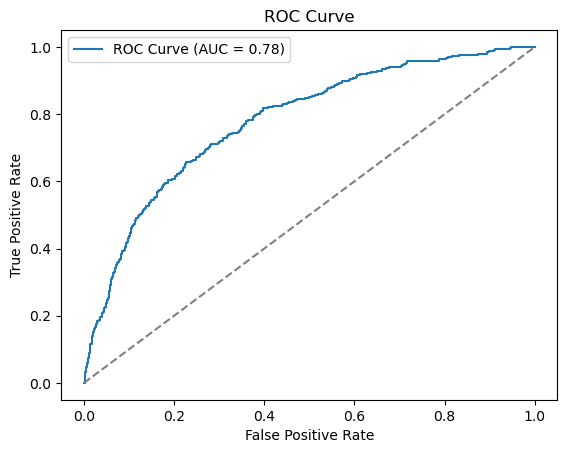

In [28]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

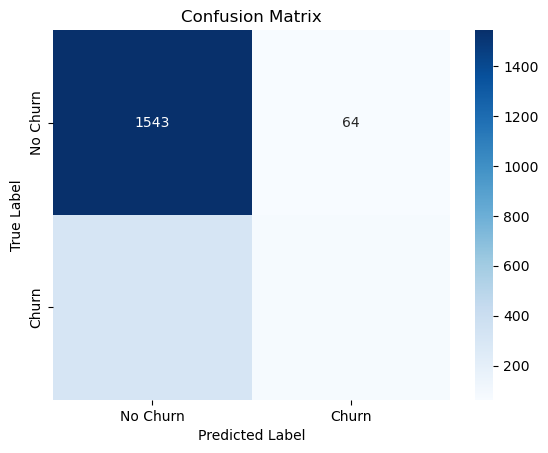

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Create a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display some sample rows
print(results_df.sample(10))  # Shows 10 random rows for comparison

      Actual  Predicted
4908       1          0
9515       0          0
568        0          0
233        0          0
5156       0          0
5170       0          0
7565       1          0
9808       0          0
1400       0          0
4502       1          0


In [31]:
# Adding a new column to indicate correct/incorrect predictions
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Display results
print(results_df.head(10))

      Actual  Predicted  Correct
6252       0          0     True
4684       0          0     True
1731       0          0     True
4742       0          0     True
4521       0          0     True
6340       0          0     True
576        0          0     True
5202       1          0    False
6363       0          0     True
439        0          0     True


In [32]:
# Count the number of correct predictions
correct_predictions = results_df['Correct'].sum()
total_predictions = len(results_df)
accuracy = correct_predictions / total_predictions
print(f'Correct Predictions: {correct_predictions}/{total_predictions}')
print(f'Accuracy: {accuracy:.2f}')

Correct Predictions: 1622/2000
Accuracy: 0.81


In [33]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [34]:
# Display the misclassified cases
misclassified = results_df[results_df['Correct'] == False]
print(misclassified)

      Actual  Predicted  Correct
5202       1          0    False
2750       1          0    False
5272       1          0    False
5653       0          1    False
4640       1          0    False
...      ...        ...      ...
964        1          0    False
6412       1          0    False
7853       1          0    False
1095       1          0    False
6929       1          0    False

[378 rows x 3 columns]


# Using XGBoost for Further Improvement

In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [36]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [37]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\kiransindam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [38]:
# Get the best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy: 0.86


In [39]:
# Train the model with the best parameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [40]:
# Evaluate the model on the test set
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.2f}')

Accuracy on Test Set: 0.86


# Generate a Confusion Matrix

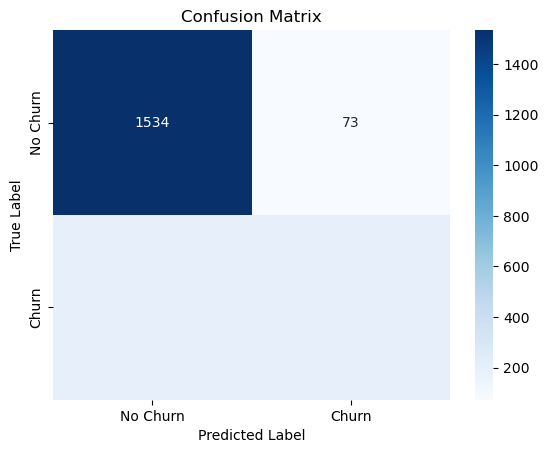

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuning Using Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [44]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [45]:
# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=300, random_state=42)

In [46]:
# Get the best parameters and the best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy: 0.87


In [47]:
# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.2f}')

Accuracy on Test Set: 0.87


In [48]:
# Create a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display some sample rows
print(results_df.sample(10))  # Shows 10 random rows for comparison

      Actual  Predicted
8439       0          0
3647       0          0
6483       0          0
8174       0          0
5100       0          0
6685       0          0
852        0          0
6021       0          0
1606       0          0
9932       0          0


In [49]:
# Adding a new column to indicate correct/incorrect predictions
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Display results
print(results_df.head(10))

# Count the number of correct predictions
correct_predictions = results_df['Correct'].sum()
total_predictions = len(results_df)
accuracy = correct_predictions / total_predictions
print(f'Correct Predictions: {correct_predictions}/{total_predictions}')
print(f'Accuracy: {accuracy:.2f}')

      Actual  Predicted  Correct
6252       0          0     True
4684       0          0     True
1731       0          0     True
4742       0          0     True
4521       0          0     True
6340       0          0     True
576        0          0     True
5202       1          0    False
6363       0          0     True
439        0          0     True
Correct Predictions: 1731/2000
Accuracy: 0.87


In [50]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


# Step 1: Save the Trained Model

In [51]:
import joblib

# Assuming 'model' is your trained machine learning model
joblib.dump(model, 'model.pkl')

['model.pkl']